In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import warnings
warnings.filterwarnings("ignore")

plt.rcParams.update({
    'savefig.dpi': 300, 
    "figure.dpi": 300,
    "font.family": "Arial",
    "font.size": 6,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    "xtick.major.size": 3,
    "ytick.major.size": 3,
    "lines.linewidth": 0.8,
})

cm = 1/2.54  # centimeters in inches

Note - Here we only uploaded derived values from the PTUSE data. Raw PTUSE data are available on request from the corresponding author

In [4]:
timres = 239.81549929411804 / 65536
rmdf = pd.read_pickle("../data/meerkat_1708396251.ptuse.p1.rmfit.pkl")
rmdf["time"] = rmdf["intidx"] * timres

# exclude poor rm fitting timestamp
indbool = (rmdf["paerr"] < 3.)
crmdf = rmdf[indbool]

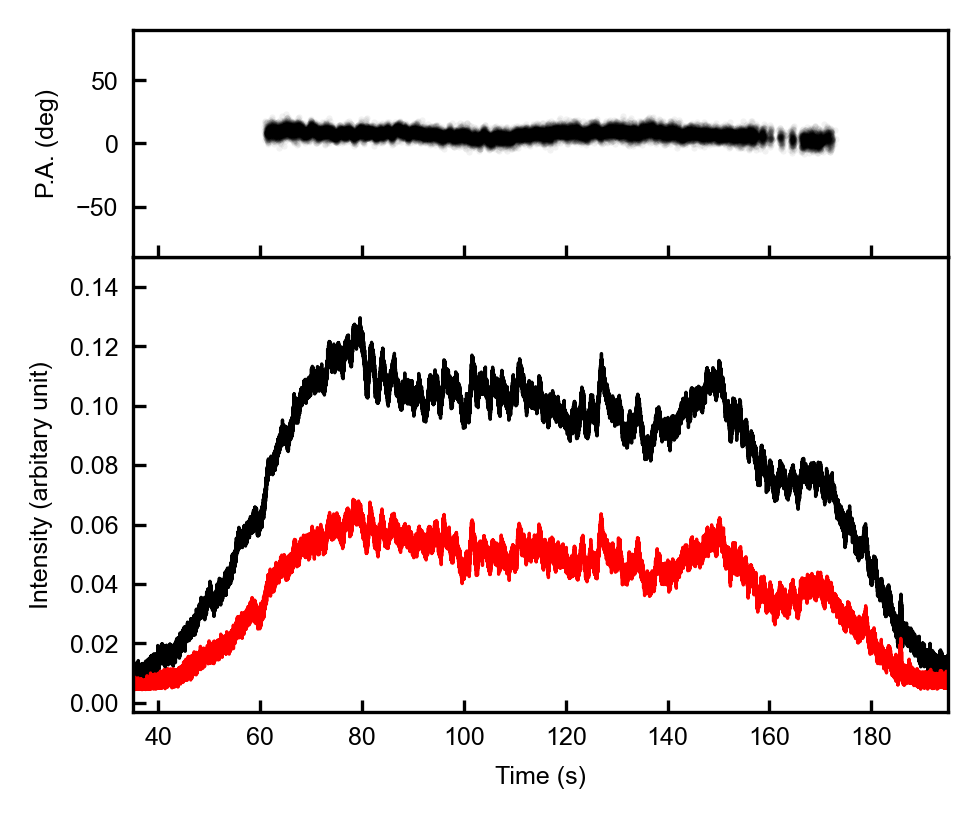

In [9]:
fig = plt.figure(figsize=(8.9*cm, 7.5*cm))
gs = GridSpec(figure=fig, nrows=6, ncols=1, hspace=0, wspace=0)

ax = fig.add_subplot(gs[2:, :])
ax.plot(
    rmdf.time, rmdf.totflux, color="black",
)
ax.plot(
    rmdf.time, rmdf.linflux, color="red",
)

ax.set_ylim(-0.003, 0.15)
ax.set_xlim(35, 195)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Intensity (arbitary unit)")

ax = fig.add_subplot(gs[:2, :])
ax.scatter(
    crmdf.time, crmdf.pa - 90, s=1,
    marker=".", alpha=0.05, color="k"
)

ax.set_ylim(-90, 90)
ax.set_xlim(35, 195)
ax.set_xticklabels([])
ax.set_ylabel("P.A. (deg)")

fig.savefig("meerkat.ptuse.p1.pa.pdf", bbox_inches="tight", dpi=300)